#### Report
As data scientist working at TeleCom Inc., a telecommunications company. The
company is facing a challenge with high customer churn rates, which is impacting
revenue and growth. Your team has been tasked with developing a predictive model
to identify customers who are likely to churn, allowing the company to proactively
address their concerns and improve retention strategies.

In this section, we delve into the implementation of AI algorithms in Python to predict customer churn for TeleCom Inc. Canada. The codebase is structured to systematically preprocess the data, engineer relevant features, build predictive models, and evaluate their performance.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [31]:
df.head()

,tenure,MonthlyCharges,TotalCharges,TotalCharges_Intensity,Partner_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,PaperlessBilling_Yes,Contract_One year,Contract_Two year,...,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,-1.280248,-1.161694,-0.994194,-1.157889,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.064303,-0.260878,-0.173740,-0.305658,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,-1.239504,-0.363923,-0.959649,-0.355305,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.512486,-0.747850,-0.195248,-0.791614,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.239504,0.196178,-0.940457,0.365282,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0


Q1: As part of the initial analysis, load the dataset and perform
Exploratory Data Analysis (EDA). Document your findings on:

■ The overall structure of the dataset.

In [3]:
# The data provided is composed 21 different data atributes, and 7043 data entries/customers. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This data set is composed by several object type atributes or columns. This means that in the data we will find different columns using categorical data from the customers, latter on this data will to be turn into numerical atributes, and use the functions pd.get_dummies() from the Pandas library. 

■ Key statistics and distribution of features.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
print(df["MultipleLines"].value_counts(),"\n\n",
      df["InternetService"].value_counts(),"\n\n",
      df["OnlineSecurity"].value_counts(),"\n\n",
      df["OnlineBackup"].value_counts(),"\n\n",
      df["DeviceProtection"].value_counts(),"\n\n",
      df["TechSupport"].value_counts(),"\n\n",
      df["StreamingTV"].value_counts(),"\n\n",
      df["StreamingMovies"].value_counts(),"\n\n",
      df["Contract"].value_counts(),"\n\n",
      df["PaymentMethod"].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

 No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64 

 No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64 

 Month-to-month    3875
Two year          1695
One year        

In [6]:
#Each data entry does not have duplicated customers. 
df["customerID"].value_counts().sum()

7043

■ The presence of any missing values or anomalies

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df["TotalCharges"]=df["TotalCharges"].apply(lambda x : x.replace(" ", "0"))
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: pd.to_numeric(x))

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


#### Feature Engineering
○ Q3: Create and select features that could be relevant for predicting
customer churn. Consider the following:

■ Deriving features from existing data, such as customer tenure or
usage patterns.

For this problem we consider that there there is relevant information between Tenure and total Charges, this create an understanding how intense is the person willing to give the money to TeleCom Inc.

In [12]:
df["TotalCharges_Intensity"]=df["TotalCharges"]/df["tenure"]

In [13]:
df=df.dropna()

Checking the data we can divide it into 3 different segments. First, data that provide insights about how stable and fix to a location are the customers. Second, data related to the number of services the customer have contracted with TeleCom Inc. Third, information about the contract and the expenses the customer are experiencing for having TeleCom Inc. services.

The data for Tenure we consider that it is relevant for all 3 data partitions and latter on we will join all of them in order to create a unified method. 

In [14]:
list(set(df.columns)-{"MonthlyCharges","TotalCharges","tenure","TotalCharges_Intensity"})

['Partner',
 'DeviceProtection',
 'customerID',
 'PaperlessBilling',
 'Contract',
 'TechSupport',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn',
 'gender',
 'OnlineSecurity',
 'StreamingMovies',
 'Dependents',
 'PhoneService',
 'InternetService',
 'StreamingTV',
 'OnlineBackup',
 'MultipleLines']

■ Encoding categorical variables appropriately.

In [15]:
df =df.drop(columns="customerID")

In [16]:
df = pd.get_dummies(df,columns=list(set(df.columns)-{"MonthlyCharges","TotalCharges","tenure","TotalCharges_Intensity"}),drop_first=True)

■ Scaling numerical features to ensure model stability.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
y = df["Churn_Yes"]

In [19]:
## The tenure and the Monthly Charges are the only numbers to be 
scaler = StandardScaler()
df['tenure'] = scaler.fit_transform(df[['tenure']])
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = scaler.fit_transform(df[['TotalCharges']])
df['TotalCharges_Intensity'] = scaler.fit_transform(df[['TotalCharges_Intensity']])

○ Q4: Describe the feature engineering process and justify the choices
made to improve model performance.

#### Model Development

In [20]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
X=df.drop(columns="Churn_Yes")
y=df["Churn_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

○ Q5: Develop a range of predictive models to forecast customer churn.
You are free to use various algorithms based on your understanding and
the problem requirements. Your goal is to explore different approaches
and determine which model performs best.

### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

Random Forest Classifier
                 precision    recall  f1-score   support

Will not Churn       0.84      0.89      0.87      1052
    Will Churn       0.62      0.50      0.55       355

      accuracy                           0.80      1407
     macro avg       0.73      0.70      0.71      1407
  weighted avg       0.78      0.80      0.79      1407



Text(0.5, 1.0, 'Random Forest Classifier')

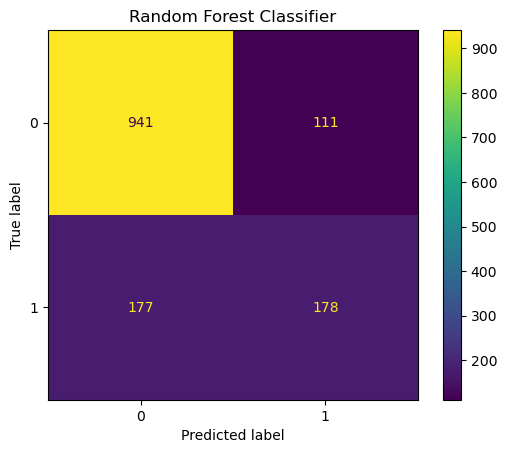

In [46]:
report = classification_report(y_test, rf_predictions, 
                               target_names=['Will not Churn', 'Will Churn'])
print("Random Forest Classifier\n",report)

cm = confusion_matrix(y_test, rf_predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Random Forest Classifier")

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X_train, y_train)
predict = logistic.predict(X_test)

c:\Users\dfrue\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
                 precision    recall  f1-score   support

Will not Churn       0.86      0.90      0.88      1052
    Will Churn       0.66      0.55      0.60       355

      accuracy                           0.81      1407
     macro avg       0.76      0.73      0.74      1407
  weighted avg       0.81      0.81      0.81      1407



Text(0.5, 1.0, 'Logistic Regression')

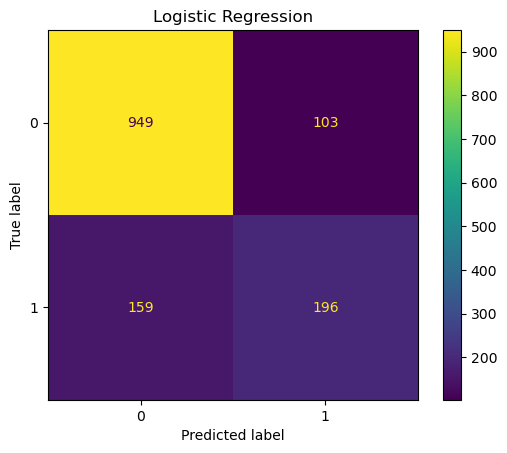

In [45]:
report = classification_report(y_test, predict, target_names=['Will not Churn', 'Will Churn'])
print("Logistic Regression\n",report)

cm = confusion_matrix(y_test, predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Logistic Regression")

#### SVC

In [26]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

SVC
                 precision    recall  f1-score   support

Will not Churn       0.84      0.92      0.88      1052
    Will Churn       0.67      0.49      0.56       355

      accuracy                           0.81      1407
     macro avg       0.76      0.70      0.72      1407
  weighted avg       0.80      0.81      0.80      1407



Text(0.5, 1.0, 'SVC')

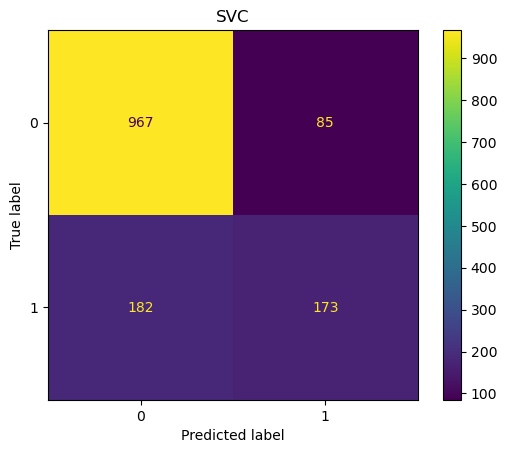

In [47]:
report = classification_report(y_test, predictions, target_names=['Will not Churn', 'Will Churn'])
print("SVC\n",report)

cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("SVC")

#### Keras

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
model=Sequential()

model.add(Dense(units=40,activation="relu"))#hiden
model.add(Dense(units=20,activation="relu"))#hiden
model.add(Dense(units=40,activation="tanh"))#hiden

model.add(Dense(units=1 ,activation="sigmoid")) #output
model.compile(optimizer="adam",loss="binary_crossentropy")

In [35]:
early_stop  = EarlyStopping(monitor  = "val_loss",
                            patience = 40,
                            verbose  = 1,
                            mode="min")

In [36]:
model.fit(X_train,
          y_train,
          epochs=500,
          validation_data = (X_test,y_test),
          callbacks = early_stop)

Epoch 1/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5214 - val_loss: 0.4211
Epoch 2/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4219 - val_loss: 0.4211
Epoch 3/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4105 - val_loss: 0.4153
Epoch 4/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4061 - val_loss: 0.4153
Epoch 5/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4080 - val_loss: 0.4109
Epoch 6/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3994 - val_loss: 0.4108
Epoch 7/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3953 - val_loss: 0.4196
Epoch 8/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4037 - val_loss: 0.4145
Epoch 9/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4035 - val_loss: 0.4130
Epoch 10/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4069 - val_loss: 0.4122
Epoch 11/500
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3957 - val_loss: 0.4125
Epoch 12/500
176/176 ━━━━━━━━━━━━━━━━━━━━

In [41]:
prediction_k= model.predict(X_test)
prediction_k=np.where(prediction>0.5,1,0)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step


NN
                 precision    recall  f1-score   support

Will not Churn       0.83      0.91      0.87      1052
    Will Churn       0.63      0.45      0.52       355

      accuracy                           0.79      1407
     macro avg       0.73      0.68      0.70      1407
  weighted avg       0.78      0.79      0.78      1407



Text(0.5, 1.0, 'NN')

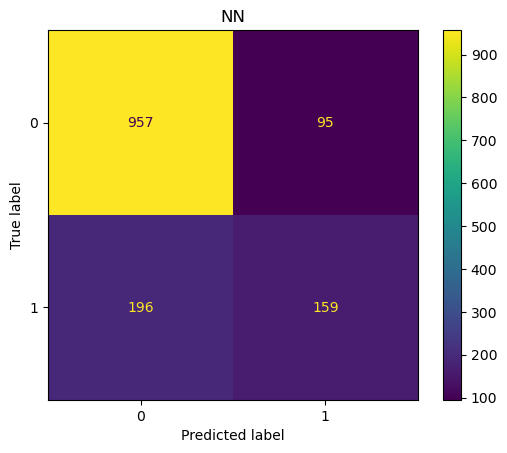

In [48]:
report = classification_report(y_test, prediction_k, target_names=['Will not Churn', 'Will Churn'])
print("NN\n",report)

cm = confusion_matrix(y_test, prediction_k)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("NN")